In [28]:
import sys
sys.path.append('/Users/michal/PythonProjects/MOTIVE')
from simulation_parameters import *
from imports_file import *
from matplotlib.colors import LogNorm

# PSD 1D

### upload dataset

In [29]:
dst_path = os.path.join(data_path_psd, "psd1_test_1.nc")
dat_dst = Dataset(dst_path, 'r')
freq = dat_dst.variables['freq'][:]/4
psd = dat_dst.variables['psd'][:]
depths = dat_dst.variables['depths'][:]
dat_dst.close()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michal/Data/MOTIVE/psd/psd1_test_1.nc'

### plot psd

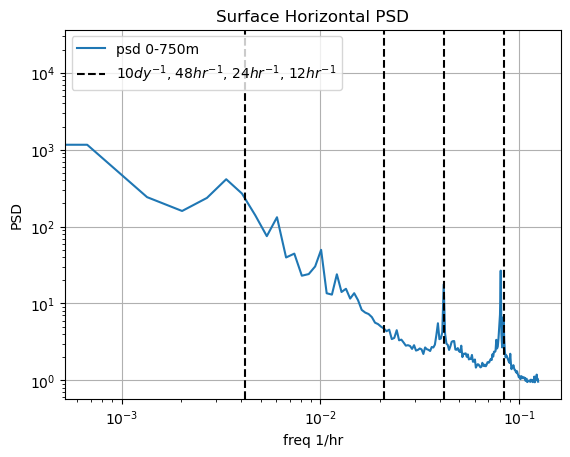

In [110]:
# plt.plot(freq, psd.mean(axis=0))
plt.plot(freq, psd.mean(axis=0))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq 1/hr')
plt.ylabel('PSD')
plt.title('Surface Horizontal PSD')
plt.grid(True)
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['psd 0-750m', '10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'])
plt.show()

(49, 219) (88,) (49,)


TypeError: Dimensions of C (49, 219) are incompatible with X (49) and/or Y (88); see help(pcolormesh)

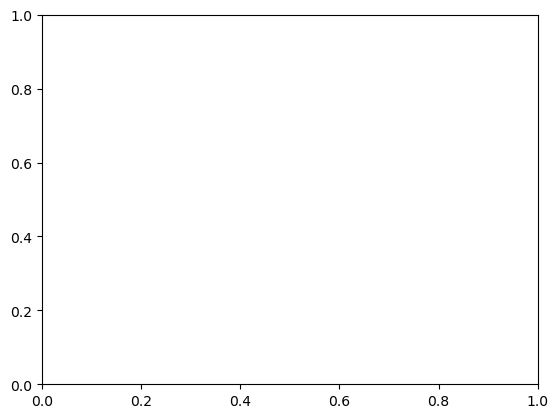

In [15]:
plt.close()
print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=psd.min(), vmax=1e3)
plt.pcolormesh(freq,depths,psd, shading='nearest', norm=norm, cmap='jet')
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
plt.axvline(1/24/10,0,1e8, linestyle='--', c='k')
plt.legend(['10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'],loc=4)
plt.xscale('log')
plt.xlim(freq[1],freq[-1])
plt.colorbar()
plt.show()

## PSD 2D

In [81]:
dst_path = os.path.join(data_path_psd, "psd2d_xi_223_1333_eta_137_137.nc")
dat_dst = Dataset(dst_path, 'r')
kh = dat_dst.variables['kh'][:]*1000
psd = dat_dst.variables['psd'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
dat_dst.close()

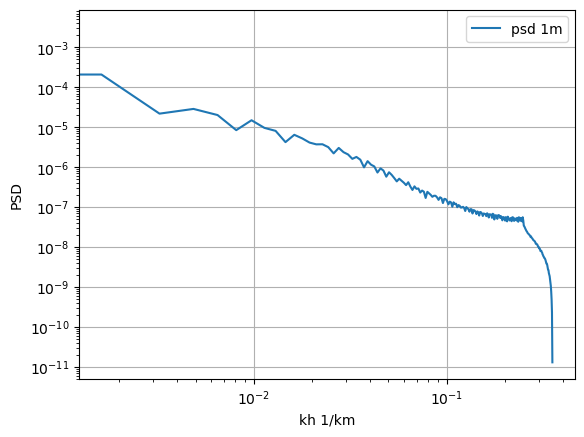

In [82]:
plt.plot(kh, psd.mean(axis=0))
# plt.plot(freq, psd[1,:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('kh 1/km')
plt.ylabel('PSD')
plt.grid(True)
plt.legend(['psd 1m', 'psd 40m', 'psd 200m'])
plt.show()

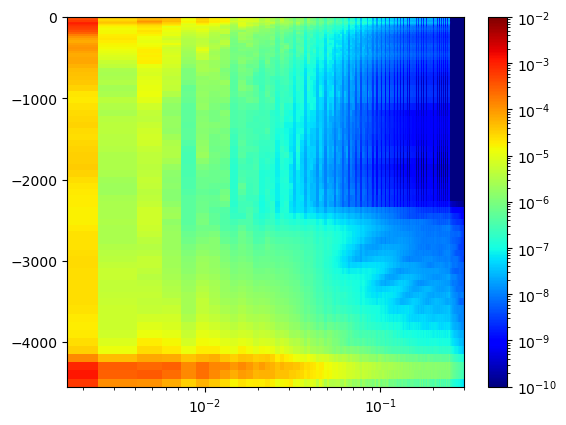

In [85]:
plt.close()
# print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=1e-10, vmax=1e-2)
plt.pcolormesh(kh,depths,psd, shading='nearest', norm=norm, cmap='jet')

plt.xscale('log')
plt.xlim(kh[1],3e-1)
# plt.ylim(-60,0)
plt.colorbar()
plt.show()

## PSD 3D

In [32]:
dst_path = os.path.join(data_path_psd, "psd3d_xi_223_1333_eta_137_359.nc")
dat_dst = Dataset(dst_path, 'r')
kh = dat_dst.variables['kh'][:]*1000
freq = dat_dst.variables['freq'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
psd = dat_dst.variables['psd'][np.logical_and(depths<=-100,depths>=-700),:,:]
psd=np.mean(psd,axis=0)
dat_dst.close()

In [33]:
psd.shape

(337, 219)

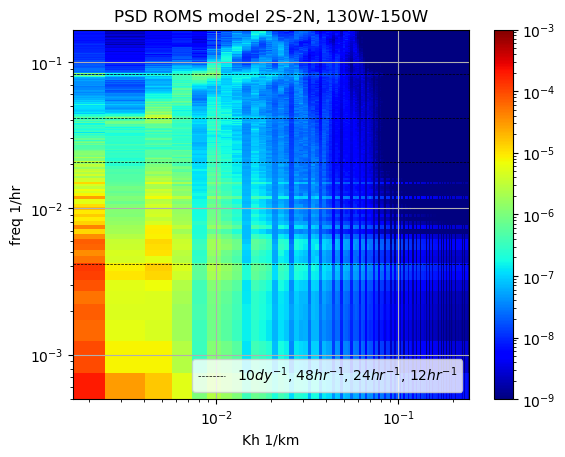

In [34]:
plt.close()
# print(psd.shape, depths.shape, freq.shape)
# norm = LogNorm(vmin=psd.min(), vmax=psd.max())
norm = LogNorm(vmin=1e-9, vmax=1e-3)
plt.pcolormesh(kh,freq,psd, shading='nearest', norm=norm, cmap='jet')

plt.xscale('log')
plt.yscale('log')
plt.xlim(kh[1],kh[-68])
plt.ylim(freq[1],freq[-1])
plt.colorbar()
plt.xlabel('Kh 1/km')
plt.ylabel('freq 1/hr')
plt.title('PSD ROMS model 2S-2N, 130W-150W')
plt.grid(True)
plt.axhline(1/12,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.axhline(1/24,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.axhline(1/48,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.axhline(1/24/10,0,1e8, linestyle='--', c='k', linewidth=0.5)
plt.legend(['10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'], loc=4)

plt.show()

In [19]:
dst_path_real = os.path.join(data_path_psd, "fft_real_zonal_freq_xi_223_1333_eta_137_359.nc")
dat_dst = Dataset(dst_path_real, 'r')
kx = dat_dst.variables['kx'][:]*1000
freq = dat_dst.variables['freq'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
fft_real = dat_dst.variables['psd'][0,:int(len(freq)/2),:]
dat_dst.close()

dst_path_imag = os.path.join(data_path_psd, "fft_imag_zonal_freq_xi_223_1333_eta_137_359.nc")
dat_dst = Dataset(dst_path_imag, 'r')
kx = dat_dst.variables['kx'][:]*1000
freq = dat_dst.variables['freq'][:]
# freq = np.arange(len(psd[0,:]))
depths = dat_dst.variables['depths'][:]
fft_imag = dat_dst.variables['psd'][0,:int(len(freq)/2),:]
dat_dst.close()

# freq = np.fft.fftshift(freq)
freq=freq[:int(len(freq)/2)]
kx = np.fft.fftshift(kx)
fft_real = np.fft.fftshift(fft_real, axes=(1,))
fft_imag = np.fft.fftshift(fft_imag, axes=(1,))

In [20]:
print(fft_imag.shape)
print(fft_imag[10,10])

(336, 1110)
-7.626376e-06


In [21]:
psd=fft_real**2+fft_imag**2

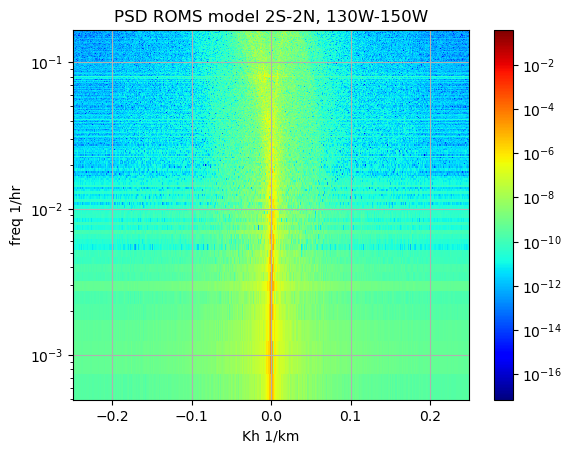

In [26]:
plt.close()
# print(psd.shape, depths.shape, freq.shape)
norm = LogNorm(vmin=psd.min(), vmax=psd.max())
# norm = LogNorm(vmin=1e-9, vmax=1e-3
plt.pcolormesh(kx,freq,psd, shading='nearest', norm=norm, cmap='jet')

# plt.xscale('log')
plt.yscale('log')
# plt.xlim(kx[1],kx[-1])
plt.ylim(freq[1],freq[-1])
plt.colorbar()
plt.xlabel('Kh 1/km')
plt.ylabel('freq 1/hr')
plt.title('PSD ROMS model 2S-2N, 130W-150W')
plt.grid(True)
# plt.axhline(1/12,0,1e8, linestyle='--', c='k', linewidth=0.5)
# plt.axhline(1/24,0,1e8, linestyle='--', c='k', linewidth=0.5)
# plt.axhline(1/48,0,1e8, linestyle='--', c='k', linewidth=0.5)
# plt.axhline(1/24/10,0,1e8, linestyle='--', c='k', linewidth=0.5)
# plt.legend(['10$dy^{-1}$, 48$hr^{-1}$, 24$hr^{-1}$, 12$hr^{-1}$'], loc=4)

plt.show()